# Simple tomography code examples

In this notebook, we'll try to go over the fundamental concepts of tomography:
1. Projections
2. Radon transform
3. Backprojection
4. Filtered backprojection


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data_dir
from skimage.transform import radon, iradon, rescale
from skimage.io import imread

%matplotlib inline

We load a few images to play with. Two of these images have been generated and one is the famous Shepp-Logan phantom.

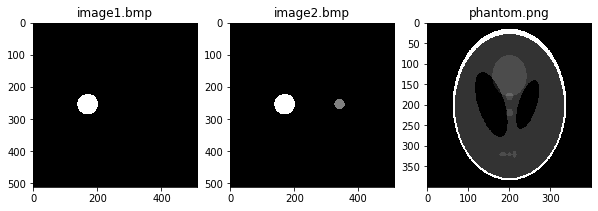

In [2]:
# Two images stored locally (you should have copied them)
image1 = imread('image1.bmp', as_gray=True)
image2 = imread('image2.bmp', as_gray=True)
# Load the phantom image from the scikit-learn data set
phantom_image = imread(data_dir + "/phantom.png", as_gray=True)

use_circle = False

# Plot the loaded images
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (10,20))
plt.gray()
ax1.imshow(image1)
ax1.set_title('image1.bmp')
ax2.imshow(image2)
ax2.set_title('image2.bmp')
ax3.imshow(phantom_image)
ax3.set_title('phantom.png')
plt.show()

# Projections along a single angle

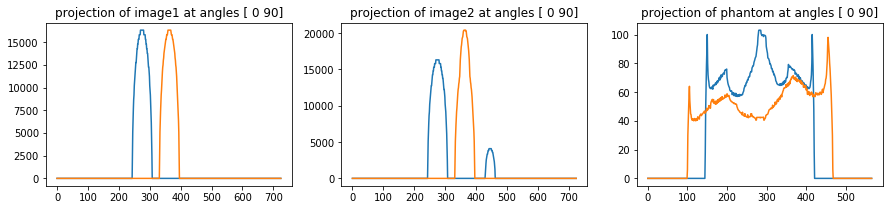

In [3]:
# Now we take a projection along two angles, 0 and 90 degrees
theta = np.array([0, 90])

p_theta_1 = radon(image1, theta, circle=use_circle)
p_theta_2 = radon(image2, theta, circle=use_circle)
p_theta_3 = radon(phantom_image, theta, circle=use_circle)

# Plot the three projections
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,3))
ax1.plot(p_theta_1)
ax2.plot(p_theta_2)
ax3.plot(p_theta_3)
ax1.set_title("projection of image1 at angles " + str(theta))
ax2.set_title("projection of image2 at angles " + str(theta))
ax3.set_title("projection of phantom at angles " + str(theta))
plt.show()

## Radon transform and sinograms

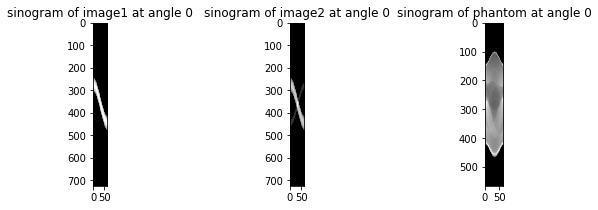

In [4]:
# Compute sampled Radon transform and plot it as a 2D image,
# the so-called sinograms

# Number of uniformly taken projections
# If 0, the number of projections for any image determined by its size
n_projections = 64

if n_projections == 0:
    theta1 = np.linspace(0., 180., max(image1.shape), endpoint=False)
    theta2 = np.linspace(0., 180., max(image2.shape), endpoint=False)
    theta3 = np.linspace(0., 180., max(phantom_image.shape), endpoint=False)
else:
    theta1 = np.linspace(0., 180., n_projections, endpoint=False)
    theta2 = np.linspace(0., 180., n_projections, endpoint=False)
    theta3 = np.linspace(0., 180., n_projections, endpoint=False)

sinogram1 = radon(image1, theta1, circle=use_circle)
sinogram2 = radon(image2, theta2, circle=use_circle)
sinogram3 = radon(phantom_image, theta3, circle=use_circle)

# Plot the three sinograms
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10,3))
ax1.imshow(sinogram1)
ax2.imshow(sinogram2)
ax3.imshow(sinogram3)
ax1.set_title("sinogram of image1 at angle 0")
ax2.set_title("sinogram of image2 at angle 0")
ax3.set_title("sinogram of phantom at angle 0")
plt.show()

## Backprojection

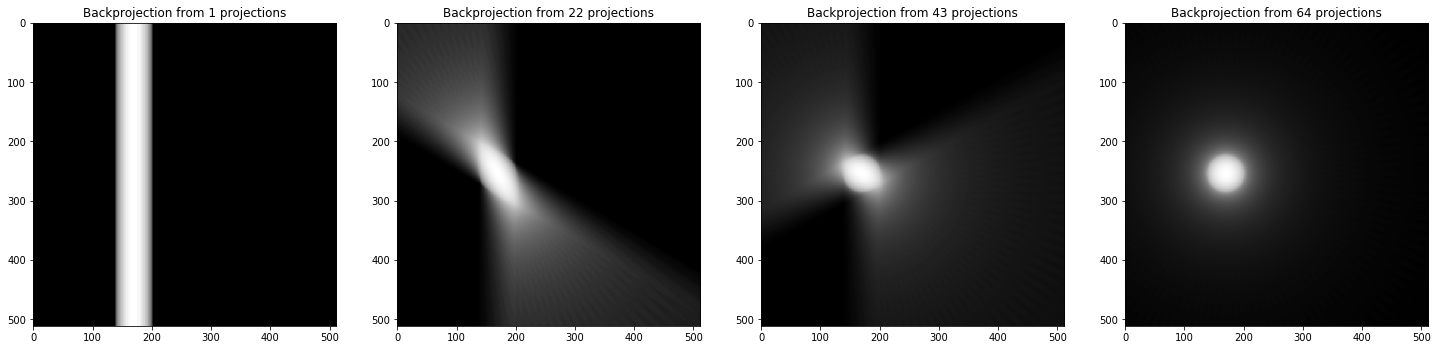

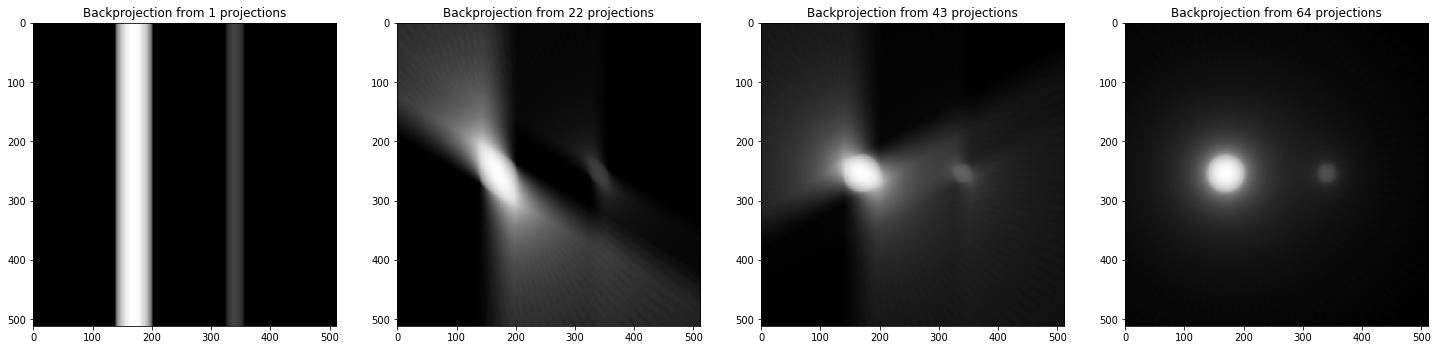

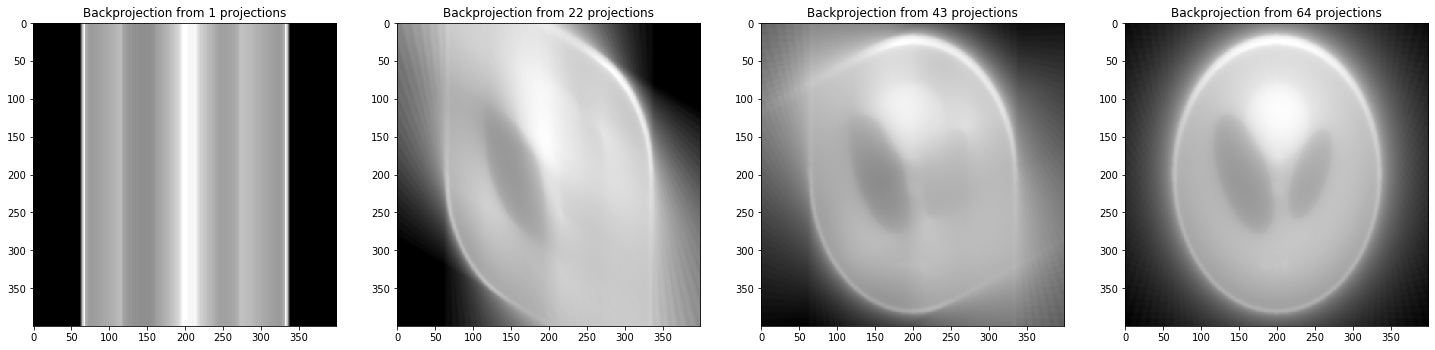

In [5]:
# Backprojection boils down to smearing the values of line integrals along the lines
# on which they were computed
# Here we show how the reconstruction improves gradually as we go from backprojecting
# a single projection to using all projections
# However, even when all projections are used, we don't arrive at the original image
n_partial_reconstructions = 4

# First image 
fig, ax = plt.subplots(1, n_partial_reconstructions, figsize = (25,7))
n_theta = np.int64(np.linspace(1, len(theta1), n_partial_reconstructions, endpoint=True))
i = 0
for n in n_theta:
    backprojection_i = iradon(sinogram1[:,:n], theta=theta1[:n], 
                              circle=use_circle, filter=None)
    ax[i].imshow(backprojection_i)
    ax[i].set_title("Backprojection from " + str(n) + " projections")
    i = i + 1
plt.show()

# Second image 
fig, ax = plt.subplots(1, n_partial_reconstructions, figsize = (25,7))
n_theta = np.int64(np.linspace(1, len(theta2), n_partial_reconstructions, endpoint=True))
i = 0
for n in n_theta:
    backprojection_i = iradon(sinogram2[:,:n], theta=theta2[:n], 
                              circle=use_circle, filter=None)
    ax[i].imshow(backprojection_i)
    ax[i].set_title("Backprojection from " + str(n) + " projections")
    i = i + 1
plt.show()

# Shepp-Logan phantom
fig, ax = plt.subplots(1, n_partial_reconstructions, figsize = (25,7))
n_theta = np.int64(np.linspace(1, len(theta3), n_partial_reconstructions, endpoint=True))
i = 0
for n in n_theta:
    backprojection_i = iradon(sinogram3[:,:n], theta=theta3[:n], 
                              circle=use_circle, filter=None)
    ax[i].imshow(backprojection_i)
    ax[i].set_title("Backprojection from " + str(n) + " projections")
    i = i + 1
plt.show()

## Filtered backprojection

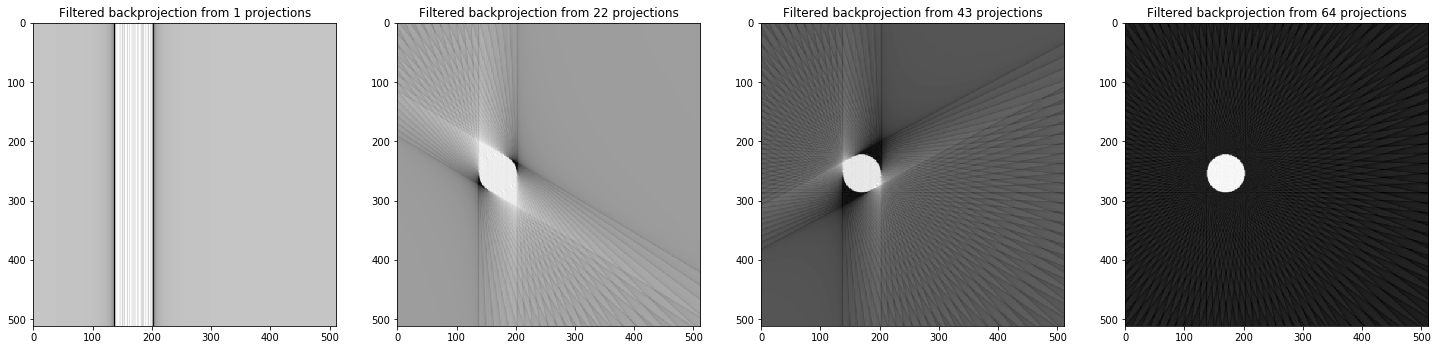

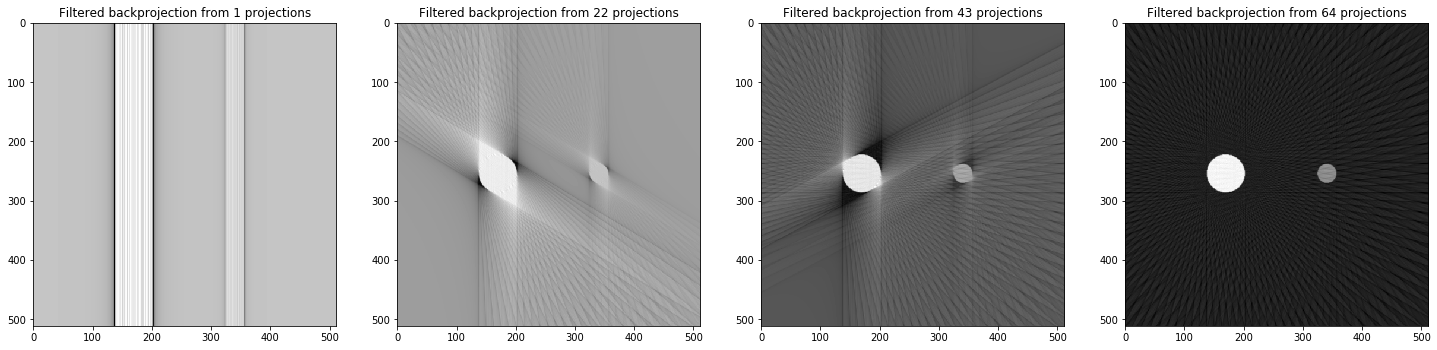

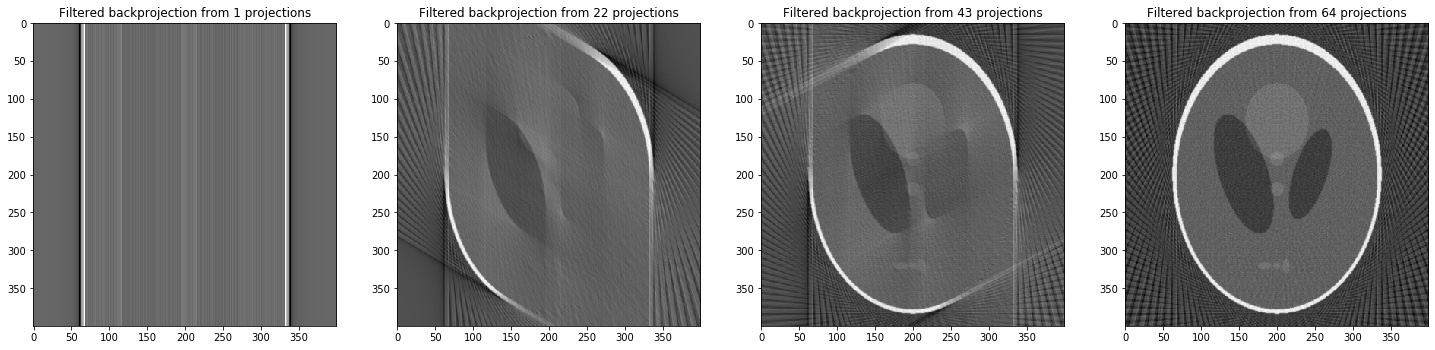

In [6]:
# We gradually compute the filtered backprojection for all three sinograms
# We want to show how the reconstruction improves gradually as we go from
# a single projection to using all projections, and that we come very close
# to the original image at the end
# Note the use of a filter that gets applied to every projection

n_partial_reconstructions = 4

# First image 
fig, ax = plt.subplots(1, n_partial_reconstructions, figsize = (25,7))
n_theta = np.int64(np.linspace(1, len(theta1), n_partial_reconstructions, endpoint=True))
i = 0
for n in n_theta:
    filtered_backprojection_i = iradon(sinogram1[:,:n], theta=theta1[:n], 
                                       circle=use_circle, filter='hamming')
    ax[i].imshow(filtered_backprojection_i)
    ax[i].set_title("Filtered backprojection from " + str(n) + " projections")
    i = i + 1
plt.show()

# Second image 
fig, ax = plt.subplots(1, n_partial_reconstructions, figsize = (25,7))
n_theta = np.int64(np.linspace(1, len(theta2), n_partial_reconstructions, endpoint=True))
i = 0
for n in n_theta:
    filtered_backprojection_i = iradon(sinogram2[:,:n], theta=theta2[:n], 
                                       circle=use_circle, filter='hamming')
    ax[i].imshow(filtered_backprojection_i)
    ax[i].set_title("Filtered backprojection from " + str(n) + " projections")
    i = i + 1
plt.show()

# Shepp-Logan phantom
fig, ax = plt.subplots(1, n_partial_reconstructions, figsize = (25,7))
n_theta = np.int64(np.linspace(1, len(theta3), n_partial_reconstructions, endpoint=True))
i = 0
for n in n_theta:
    filtered_backprojection_i = iradon(sinogram3[:,:n], theta=theta3[:n], 
                                       circle=use_circle, filter='hamming')
    ax[i].imshow(filtered_backprojection_i)
    ax[i].set_title("Filtered backprojection from " + str(n) + " projections")
    i = i + 1
plt.show()